# Store Sales Time-Series Forecasting
Thomas Tran

DATA-3421

The data can be accessed on the Kaggle website at this link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
from sklearn.metrics import mean_absolute_percentage_error

## Read in Data

In [3]:
df = pd.read_csv('train.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')
stores = pd.read_csv('stores.csv')
transaction = pd.read_csv('transactions.csv')

In [4]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [8]:
transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


## Data Preprocessing

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df = df.set_index(['date'])

In [11]:
df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [12]:
average_sales = df.groupby(['date']).mean()['sales']

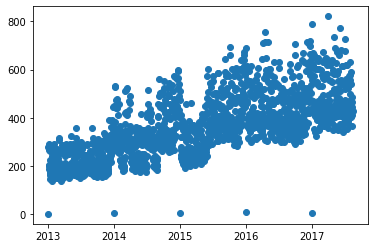

In [13]:
plt.scatter(average_sales.index,average_sales)
plt.show()

## Oil

In [14]:
oil['date'] = pd.to_datetime(oil['date'])

In [15]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [16]:
idx = pd.date_range('2013-01-01','2017-08-31')

In [17]:
oil = oil.set_index('date')
oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


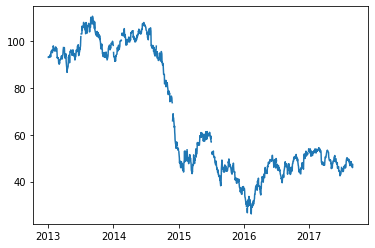

In [18]:
plt.plot(oil['dcoilwtico'])

In [19]:
oil = oil.reindex(idx, fill_value = np.nan)

In [20]:
oil

,dcoilwtico
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,NaN
...,...
2017-08-27,NaN
2017-08-28,46.40
2017-08-29,46.46
2017-08-30,45.96


In [21]:
oil.fillna(oil.rolling(3,min_periods=1).mean(),inplace=True)

In [22]:
oil.loc[oil['dcoilwtico'].isna()]

,dcoilwtico
2013-01-01,NaN
2013-01-21,NaN
2013-02-18,NaN
2013-03-31,NaN
2013-05-27,NaN
2013-09-02,NaN
2014-01-20,NaN
2014-02-17,NaN
2014-04-20,NaN
2014-05-26,NaN


In [23]:
oil.isna().sum()

dcoilwtico    34
dtype: int64

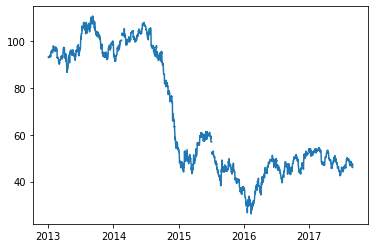

In [24]:
plt.plot(oil['dcoilwtico'])

In [25]:
df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [26]:
oil['date'] = oil.index

In [27]:
df = df.merge(oil,how = 'left', on = 'date')

In [28]:
df

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,1,1,BABY CARE,0.000,0,NaN
2,2013-01-01,2,1,BEAUTY,0.000,0,NaN
3,2013-01-01,3,1,BEVERAGES,0.000,0,NaN
4,2013-01-01,4,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
3000883,2017-08-15,3000883,9,POULTRY,438.133,0,47.57
3000884,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,47.57
3000885,2017-08-15,3000885,9,PRODUCE,2419.729,148,47.57
3000886,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [29]:
df.loc[df['dcoilwtico'].isna()]

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,1,1,BABY CARE,0.000,0,NaN
2,2013-01-01,2,1,BEAUTY,0.000,0,NaN
3,2013-01-01,3,1,BEVERAGES,0.000,0,NaN
4,2013-01-01,4,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
2926039,2017-07-04,2926039,9,POULTRY,445.248,0,NaN
2926040,2017-07-04,2926040,9,PREPARED FOODS,102.699,1,NaN
2926041,2017-07-04,2926041,9,PRODUCE,2505.442,155,NaN
2926042,2017-07-04,2926042,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,NaN


In [30]:
df['dcoilwtico'].fillna(0,inplace=True)

In [31]:
df

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,0.00
1,2013-01-01,1,1,BABY CARE,0.000,0,0.00
2,2013-01-01,2,1,BEAUTY,0.000,0,0.00
3,2013-01-01,3,1,BEVERAGES,0.000,0,0.00
4,2013-01-01,4,1,BOOKS,0.000,0,0.00
...,...,...,...,...,...,...,...
3000883,2017-08-15,3000883,9,POULTRY,438.133,0,47.57
3000884,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,47.57
3000885,2017-08-15,3000885,9,PRODUCE,2419.729,148,47.57
3000886,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


## Stores

In [32]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


## Holidays

In [33]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


### Feature Creation

In [34]:
groups = ['family','store_nbr']

In [35]:
df['tomorrow'] = df.groupby(['family','store_nbr'])['sales'].shift(-1)

In [36]:
df

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,0.00,2.0
1,2013-01-01,1,1,BABY CARE,0.000,0,0.00,0.0
2,2013-01-01,2,1,BEAUTY,0.000,0,0.00,2.0
3,2013-01-01,3,1,BEVERAGES,0.000,0,0.00,1091.0
4,2013-01-01,4,1,BOOKS,0.000,0,0.00,0.0
...,...,...,...,...,...,...,...,...
3000883,2017-08-15,3000883,9,POULTRY,438.133,0,47.57,NaN
3000884,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,47.57,NaN
3000885,2017-08-15,3000885,9,PRODUCE,2419.729,148,47.57,NaN
3000886,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,NaN


In [37]:
df.loc[(df['family']=='BEAUTY')&(df['store_nbr']==1)]

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow
2,2013-01-01,2,1,BEAUTY,0.0,0,0.000,2.0
1784,2013-01-02,1784,1,BEAUTY,2.0,0,93.140,0.0
3566,2013-01-03,3566,1,BEAUTY,0.0,0,92.970,3.0
5348,2013-01-04,5348,1,BEAUTY,3.0,0,93.120,3.0
7130,2013-01-05,7130,1,BEAUTY,3.0,0,93.045,0.0
...,...,...,...,...,...,...,...,...
2991980,2017-08-11,2991980,1,BEAUTY,1.0,1,48.810,3.0
2993762,2017-08-12,2993762,1,BEAUTY,3.0,1,48.675,1.0
2995544,2017-08-13,2995544,1,BEAUTY,1.0,0,48.810,6.0
2997326,2017-08-14,2997326,1,BEAUTY,6.0,1,47.590,4.0


In [38]:
df['yesterday'] = df.groupby(groups)['sales'].shift(1)

In [39]:
df = df.dropna(subset = ['tomorrow'])
df

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow,yesterday
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,0.00,2.000,NaN
1,2013-01-01,1,1,BABY CARE,0.000,0,0.00,0.000,NaN
2,2013-01-01,2,1,BEAUTY,0.000,0,0.00,2.000,NaN
3,2013-01-01,3,1,BEVERAGES,0.000,0,0.00,1091.000,NaN
4,2013-01-01,4,1,BOOKS,0.000,0,0.00,0.000,NaN
...,...,...,...,...,...,...,...,...,...
2999101,2017-08-14,2999101,9,POULTRY,283.429,0,47.59,438.133,412.458
2999102,2017-08-14,2999102,9,PREPARED FOODS,114.120,0,47.59,154.553,105.169
2999103,2017-08-14,2999103,9,PRODUCE,1348.425,7,47.59,2419.729,1693.607
2999104,2017-08-14,2999104,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,47.59,121.000,200.000


In [40]:
df['day_before_yesterday'] = df.groupby(groups)['sales'].shift(2)

/tmp/ipykernel_507/2597482536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_before_yesterday'] = df.groupby(groups)['sales'].shift(2)


In [41]:
df['2_days_before'] = df.groupby(groups)['sales'].shift(3)

/tmp/ipykernel_507/1979104936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2_days_before'] = df.groupby(groups)['sales'].shift(3)


In [42]:
df['rolling_mean'] = (df['sales']+df['yesterday']+df['day_before_yesterday']+df['2_days_before'])/4

/tmp/ipykernel_507/3202663609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] = (df['sales']+df['yesterday']+df['day_before_yesterday']+df['2_days_before'])/4


In [43]:
df = df.set_index('date')

In [44]:
df['year'] = df.index.year
df['day'] = df.index.day
df['month'] = df.index.month

In [45]:
df['day_sin'] = np.sin(df['day']*2*np.pi/31)
df['month_sin'] = np.sin((df['month']-1)*2*np.pi/12)

In [46]:
df.loc[(df['family']=='AUTOMOTIVE')&(df['store_nbr']==1)]

,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow,yesterday,day_before_yesterday,2_days_before,rolling_mean,year,day,month,day_sin,month_sin
date,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,0.000,2.0,NaN,NaN,NaN,NaN,2013,1,1,0.201299,0.0
2013-01-02,1782,1,AUTOMOTIVE,2.0,0,93.140,3.0,0.0,NaN,NaN,NaN,2013,2,1,0.394356,0.0
2013-01-03,3564,1,AUTOMOTIVE,3.0,0,92.970,3.0,2.0,0.0,NaN,NaN,2013,3,1,0.571268,0.0
2013-01-04,5346,1,AUTOMOTIVE,3.0,0,93.120,5.0,3.0,2.0,0.0,2.00,2013,4,1,0.724793,0.0
2013-01-05,7128,1,AUTOMOTIVE,5.0,0,93.045,2.0,3.0,3.0,2.0,3.25,2013,5,1,0.848644,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-10,2990196,1,AUTOMOTIVE,9.0,0,48.540,1.0,7.0,4.0,7.0,6.75,2017,10,8,0.897805,-0.5
2017-08-11,2991978,1,AUTOMOTIVE,1.0,0,48.810,6.0,9.0,7.0,4.0,5.25,2017,11,8,0.790776,-0.5
2017-08-12,2993760,1,AUTOMOTIVE,6.0,0,48.675,1.0,1.0,9.0,7.0,5.75,2017,12,8,0.651372,-0.5


In [47]:
df.loc[(df['family']=='BEAUTY')&(df['store_nbr']==1)]

,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow,yesterday,day_before_yesterday,2_days_before,rolling_mean,year,day,month,day_sin,month_sin
date,,,,,,,,,,,,,,,,
2013-01-01,2,1,BEAUTY,0.0,0,0.000,2.0,NaN,NaN,NaN,NaN,2013,1,1,0.201299,0.0
2013-01-02,1784,1,BEAUTY,2.0,0,93.140,0.0,0.0,NaN,NaN,NaN,2013,2,1,0.394356,0.0
2013-01-03,3566,1,BEAUTY,0.0,0,92.970,3.0,2.0,0.0,NaN,NaN,2013,3,1,0.571268,0.0
2013-01-04,5348,1,BEAUTY,3.0,0,93.120,3.0,0.0,2.0,0.0,1.25,2013,4,1,0.724793,0.0
2013-01-05,7130,1,BEAUTY,3.0,0,93.045,0.0,3.0,0.0,2.0,2.00,2013,5,1,0.848644,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-10,2990198,1,BEAUTY,10.0,1,48.540,1.0,4.0,2.0,5.0,5.25,2017,10,8,0.897805,-0.5
2017-08-11,2991980,1,BEAUTY,1.0,1,48.810,3.0,10.0,4.0,2.0,4.25,2017,11,8,0.790776,-0.5
2017-08-12,2993762,1,BEAUTY,3.0,1,48.675,1.0,1.0,10.0,4.0,4.50,2017,12,8,0.651372,-0.5


## EDA

In [48]:
df.dropna(inplace=True)

In [49]:
sales_by_day = df.groupby(['day'])['sales'].mean()

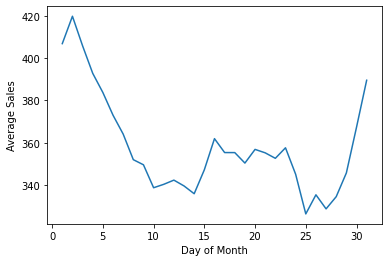

In [50]:
plt.plot(sales_by_day)
plt.xlabel('Day of Month')
plt.ylabel('Average Sales')
plt.show()

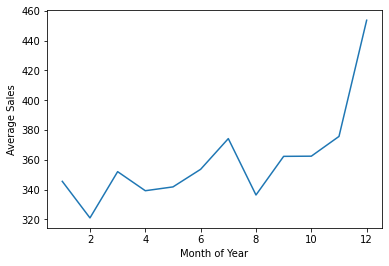

In [51]:
sales_by_month = df.groupby(['month'])['sales'].mean()
plt.plot(sales_by_month)
plt.xlabel('Month of Year')
plt.ylabel('Average Sales')
plt.show()

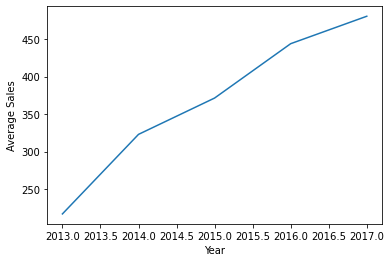

In [52]:
sales_by_year = df.groupby('year')['sales'].mean()
plt.plot(sales_by_year)
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.show()

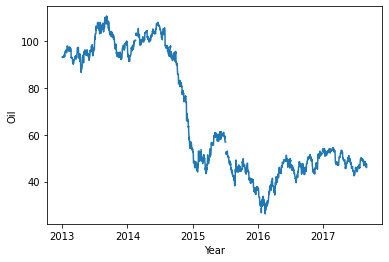

In [53]:
plt.plot(oil['dcoilwtico'])
plt.xlabel('Year')
plt.ylabel('Oil')
plt.show()

In [126]:
columns = ['onpromotion','dcoilwtico']
unique_stores = [i for i in range(1,55)]

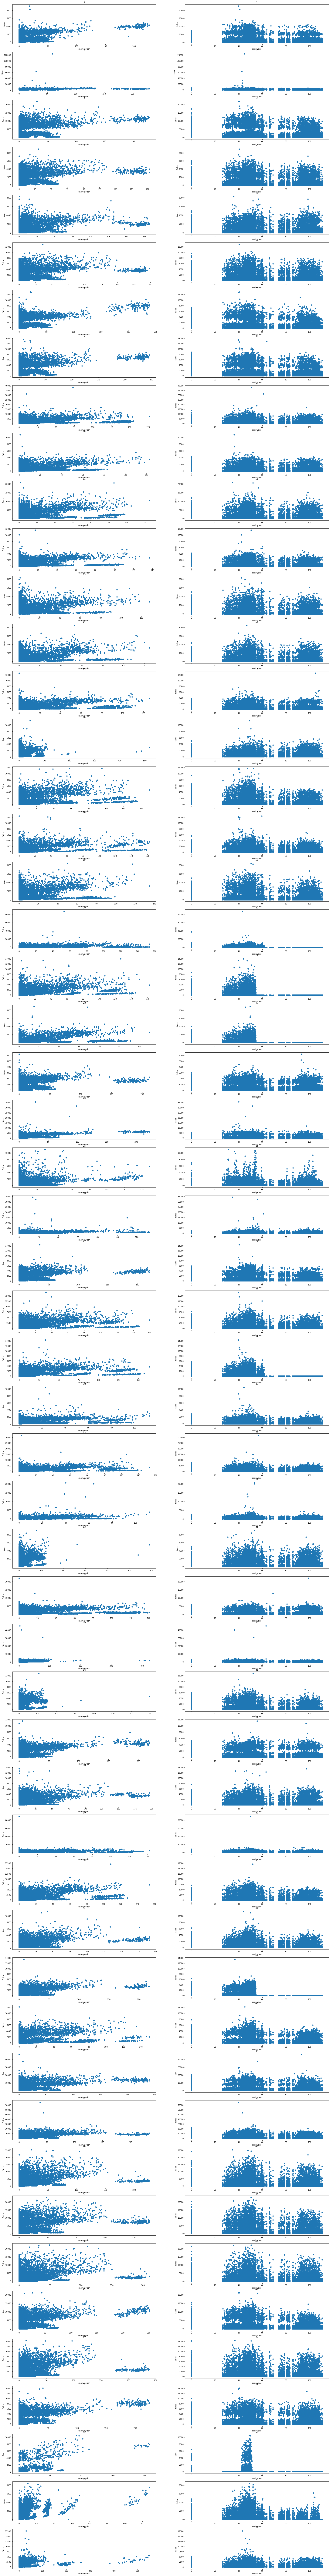

In [127]:
plt.figure(figsize=(30,250))
count=0
for number in unique_stores:
    for c in columns:
        count+=1
        plt.subplot(54,2,count)
        plt.scatter(df[df['store_nbr']==number][c],df[df['store_nbr']==number]['sales'])
        plt.title(number)
        plt.xlabel(c)
        plt.ylabel('Sales')
plt.show()

## Training

In [54]:
date = pd.to_datetime('2017-07-01')
date

Timestamp('2017-07-01 00:00:00')

In [55]:
train = df.loc[df.index<date]
val = df.loc[df.index>=date]

In [56]:
train

,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow,yesterday,day_before_yesterday,2_days_before,rolling_mean,year,day,month,day_sin,month_sin
date,,,,,,,,,,,,,,,,
2013-01-04,5346,1,AUTOMOTIVE,3.000,0,93.12,5.000,3.000000,2.000,0.000,2.00000,2013,4,1,0.724793,0.0
2013-01-04,5347,1,BABY CARE,0.000,0,93.12,0.000,0.000000,0.000,0.000,0.00000,2013,4,1,0.724793,0.0
2013-01-04,5348,1,BEAUTY,3.000,0,93.12,3.000,0.000000,2.000,0.000,1.25000,2013,4,1,0.724793,0.0
2013-01-04,5349,1,BEVERAGES,953.000,0,93.12,1160.000,919.000000,1091.000,0.000,740.75000,2013,4,1,0.724793,0.0
2013-01-04,5350,1,BOOKS,0.000,0,93.12,0.000,0.000000,0.000,0.000,0.00000,2013,4,1,0.724793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30,2918911,9,POULTRY,561.609,25,46.02,794.859,285.335000,297.789,341.027,371.44000,2017,30,6,-0.201299,0.5
2017-06-30,2918912,9,PREPARED FOODS,113.306,3,46.02,172.052,106.325000,105.939,133.523,114.77325,2017,30,6,-0.201299,0.5
2017-06-30,2918913,9,PRODUCE,1522.438,9,46.02,2055.798,1084.579000,1215.280,2093.764,1479.01525,2017,30,6,-0.201299,0.5


In [57]:
val

,id,store_nbr,family,sales,onpromotion,dcoilwtico,tomorrow,yesterday,day_before_yesterday,2_days_before,rolling_mean,year,day,month,day_sin,month_sin
date,,,,,,,,,,,,,,,,
2017-07-01,2918916,1,AUTOMOTIVE,7.000,0,45.45,4.000,11.000,1.000000,2.000,5.250000,2017,1,7,0.201299,1.224647e-16
2017-07-01,2918917,1,BABY CARE,0.000,0,45.45,0.000,0.000,0.000000,0.000,0.000000,2017,1,7,0.201299,1.224647e-16
2017-07-01,2918918,1,BEAUTY,7.000,1,45.45,2.000,2.000,2.000000,5.000,4.000000,2017,1,7,0.201299,1.224647e-16
2017-07-01,2918919,1,BEVERAGES,2596.000,27,45.45,1135.000,2496.000,2128.000000,2203.000,2355.750000,2017,1,7,0.201299,1.224647e-16
2017-07-01,2918920,1,BOOKS,0.000,0,45.45,0.000,0.000,0.000000,0.000,0.000000,2017,1,7,0.201299,1.224647e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-14,2999101,9,POULTRY,283.429,0,47.59,438.133,412.458,383.387000,525.224,401.124500,2017,14,8,0.299363,-5.000000e-01
2017-08-14,2999102,9,PREPARED FOODS,114.120,0,47.59,154.553,105.169,129.903990,112.100,115.323248,2017,14,8,0.299363,-5.000000e-01
2017-08-14,2999103,9,PRODUCE,1348.425,7,47.59,2419.729,1693.607,1419.264000,1453.078,1478.593500,2017,14,8,0.299363,-5.000000e-01


In [58]:
features = ['sales','onpromotion','yesterday','day_before_yesterday','2_days_before','rolling_mean','dcoilwtico','year','day_sin','month_sin']
target = 'tomorrow'

In [59]:
x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

In [60]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

## XGBoost

In [61]:
%%time
xgbreg = xgb.XGBRegressor(n_estimators=100,eta=0.2,early_stopping_rounds = 10)

xgbreg.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_val,y_val)],verbose=5)

[0]	validation_0-rmse:947.89460	validation_1-rmse:1127.76213
[5]	validation_0-rmse:455.81376	validation_1-rmse:486.00638
[10]	validation_0-rmse:355.86933	validation_1-rmse:351.13551
[15]	validation_0-rmse:337.42552	validation_1-rmse:329.40437
[20]	validation_0-rmse:328.67788	validation_1-rmse:324.02672
[25]	validation_0-rmse:322.27461	validation_1-rmse:323.93948
[30]	validation_0-rmse:317.25528	validation_1-rmse:321.37734
[35]	validation_0-rmse:315.70167	validation_1-rmse:322.42617
[40]	validation_0-rmse:312.10746	validation_1-rmse:322.44232
[41]	validation_0-rmse:311.91778	validation_1-rmse:322.51243
CPU times: user 7min 49s, sys: 1.34 s, total: 7min 51s
Wall time: 59.9 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [62]:
y_pred = xgbreg.predict(x_val)

In [63]:
y_pred

array([   7.062352 ,    2.9668834,    6.625574 , ..., 1477.4691   ,
        189.50854  ,   22.858917 ], dtype=float32)

In [64]:
xgbreg.score(x_val,y_val)

0.9392278832547294

In [65]:
print(f"Xgboost Score\n\n r squared: {r2_score(y_val, y_pred)}\n\n RMSE: {mean_squared_error(y_val, y_pred, squared=False)}")

Xgboost Score

 r squared: 0.9392278832547294

 RMSE: 321.21032744343825


In [66]:
results = xgbreg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

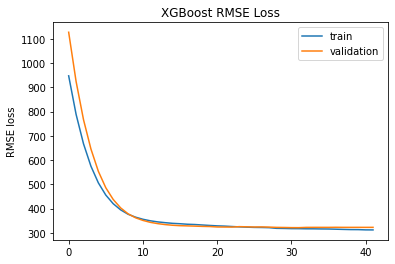

In [67]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='train')
ax.plot(x_axis, results['validation_1']['rmse'], label='validation')
ax.legend()
plt.ylabel('RMSE loss')
plt.title('XGBoost RMSE Loss')
plt.show()

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linreg = LinearRegression()

In [70]:
%%time
linreg.fit(x_train,y_train)

CPU times: user 4.03 s, sys: 2.34 s, total: 6.37 s
Wall time: 922 ms


LinearRegression()

In [71]:
y_pred_lin = linreg.predict(x_val)

In [72]:
y_pred_lin

array([  41.26738417,   36.17655211,   38.89922011, ..., 1372.05406278,
        170.2524301 ,   56.0024301 ])

In [73]:
linreg.score(x_val,y_val)

0.913713275771256

In [74]:
print(f"Xgboost Score\n\n r squared: {r2_score(y_val, y_pred_lin)}\n\n RMSE: {mean_squared_error(y_val, y_pred_lin, squared=False)}")

Xgboost Score

 r squared: 0.913713275771256

 RMSE: 382.7448090350418


## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso = Lasso()

In [78]:
%%time
lasso.fit(x_train,y_train)

CPU times: user 30min 3s, sys: 6min 54s, total: 36min 57s
Wall time: 3min 5s


/home/thomastran02/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.573e+10, tolerance: 3.504e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [80]:
y_pred_lasso = lasso.predict(x_val)

In [81]:
y_pred_lasso

array([  39.06086222,   33.97599163,   36.70848284, ..., 1366.52316164,
        166.69761049,   52.46705641])

In [86]:
lasso.score(x_val,y_val)

0.9136974182104936

In [87]:
print(f"Xgboost Score\n\n r squared: {r2_score(y_val, y_pred_lasso)}\n\n RMSE: {mean_squared_error(y_val, y_pred_lasso, squared=False)}")

Xgboost Score

 r squared: 0.9136974182104936

 RMSE: 382.77997736650235


## Accuracy and Some Final Plots

In [88]:
val['xgb'] = y_pred
val['linear'] = y_pred_lin
val['lasso'] = y_pred_lasso

/tmp/ipykernel_507/1976950468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['xgb'] = y_pred
/tmp/ipykernel_507/1976950468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['linear'] = y_pred_lin
/tmp/ipykernel_507/1976950468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

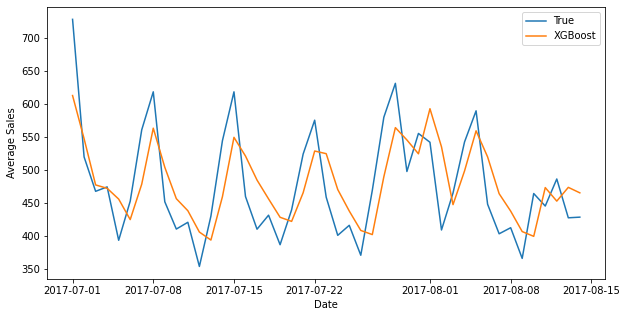

In [106]:
plt.figure(figsize=(10,5))
plt.plot(val.groupby('date')['tomorrow'].mean(), label = 'True')
plt.plot(val.groupby('date')['xgb'].mean(), label = 'XGBoost')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

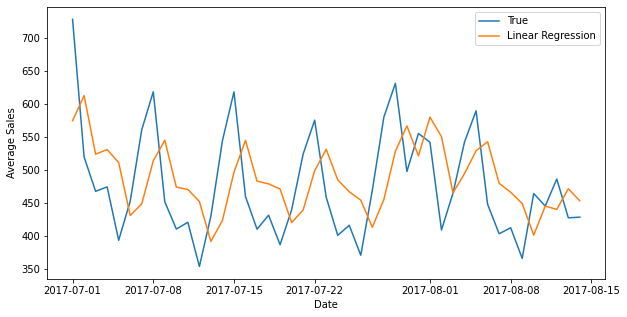

In [107]:
plt.figure(figsize=(10,5))
plt.plot(val.groupby('date')['tomorrow'].mean(), label = 'True')
plt.plot(val.groupby('date')['linear'].mean(),label = 'Linear Regression')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

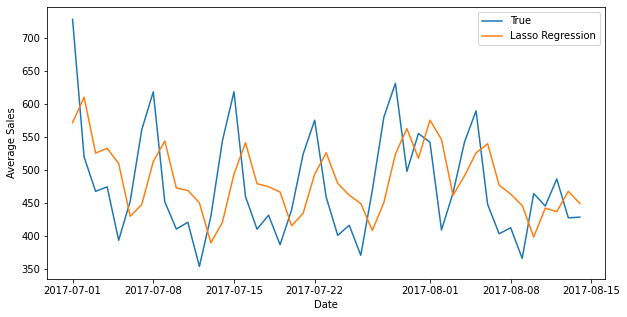

In [110]:
plt.figure(figsize=(10,5))
plt.plot(val.groupby('date')['tomorrow'].mean(), label = 'True')
plt.plot(val.groupby('date')['lasso'].mean(),label = 'Lasso Regression')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

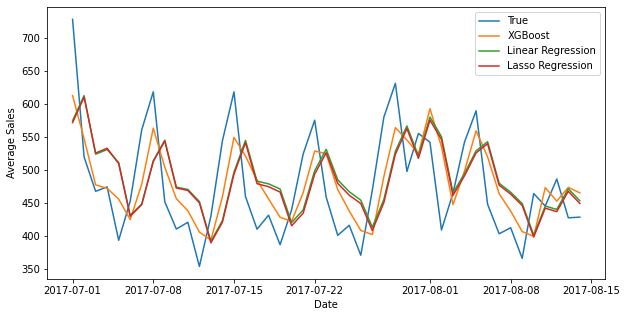

In [111]:
plt.figure(figsize=(10,5))
plt.plot(val.groupby('date')['tomorrow'].mean(), label = 'True')
plt.plot(val.groupby('date')['xgb'].mean(), label = 'XGBoost')
plt.plot(val.groupby('date')['linear'].mean(),label = 'Linear Regression')
plt.plot(val.groupby('date')['lasso'].mean(),label = 'Lasso Regression')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.legend()
plt.show()